In [8]:
from typing import Tuple, List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import shapiro, jarque_bera, skew, kurtosis, probplot
# Preprocess data
# โหลดข้อมูลหุ้น (ตัวอย่าง)
nvidia = pd.read_csv("nvidia_10yr_data.csv", parse_dates=["Date"])
meta = pd.read_csv("META_10yr_data.csv", parse_dates=["Date"])
tesla = pd.read_csv("TSLA_10yr_data.csv", parse_dates=["Date"])



nvidia['Date'] = pd.to_datetime(nvidia['Date'], format="%d/%m/%Y")
meta['Date'] = pd.to_datetime(meta['Date'], format="%d/%m/%Y")
tesla['Date'] = pd.to_datetime(tesla['Date'], format="%d/%m/%Y")


nvidia = nvidia.sort_values("Date")
meta = meta.sort_values("Date")
tesla = tesla.sort_values("Date")


# Feature engineering
# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น


# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น NVIDIA
nvidia['Return'] = nvidia['Close'].pct_change()
nvidia['Volatility'] = nvidia['Close'].rolling(10).std()
nvidia['Price_Diff'] = nvidia['High'] - nvidia['Low']
nvidia['Volume_Log'] = np.log1p(nvidia['Volume'])

# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น meta
meta['Return'] = meta['Close'].pct_change()
meta['Volatility'] = meta['Close'].rolling(10).std()
meta['Price_Diff'] = meta['High'] - meta['Low']
meta['Volume_Log'] = np.log1p(meta['Volume'])


# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น Tesla
tesla['Return'] = tesla['Close'].pct_change()
tesla['Volatility'] = tesla['Close'].rolling(10).std()
tesla['Price_Diff'] = tesla['High'] - tesla['Low']
tesla['Volume_Log'] = np.log1p(tesla['Volume'])



# Drop NaN หลัง rolling
nvidia.dropna(inplace=True)
meta.dropna(inplace=True)
tesla.dropna(inplace=True)


# Combine data for modeling

X_nvidia = nvidia[['Return', 'Volatility', 'Price_Diff', 'Volume_Log']]
y_nvidia = nvidia['Close']

X_meta = meta[['Return', 'Volatility', 'Price_Diff', 'Volume_Log']]
y_meta = meta['Close']

X_tesla = tesla[['Return', 'Volatility', 'Price_Diff', 'Volume_Log']]
y_tesla = tesla['Close']

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [9]:
import numpy
import scipy
import statsmodels
print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)
print("statsmodels:", statsmodels.__version__)


AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [13]:
# ฟังก์ชันตรวจสอบ ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print("=> Reject H0: Data is stationary\n")
    else:
        print("=> Fail to reject H0: Data is non-stationary\n")

# ฟังก์ชันตรวจสอบ KPSS test
def kpss_test(series, title=''):
    result = kpss(series, regression='c', nlags='auto')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print("=> Reject H0: Data is non-stationary\n")
    else:
        print("=> Fail to reject H0: Data is stationary\n")

adf_test(nvidia['Close'], title='Close Price')
kpss_test(nvidia['Close'], title='Close Price')

adf_test(meta['Close'], title='Close Price')
kpss_test(meta['Close'], title='Close Price')

adf_test(tesla['Close'], title='Close Price')
kpss_test(tesla['Close'], title='Close Price')


ADF Test: Close Price
ADF Statistic: 2.7588
p-value: 1.0000
=> Fail to reject H0: Data is non-stationary

KPSS Test: Close Price
KPSS Statistic: 4.5134
p-value: 0.0100
=> Reject H0: Data is non-stationary

ADF Test: Close Price
ADF Statistic: 0.6994
p-value: 0.9898
=> Fail to reject H0: Data is non-stationary

KPSS Test: Close Price
KPSS Statistic: 4.8918
p-value: 0.0100
=> Reject H0: Data is non-stationary

ADF Test: Close Price
ADF Statistic: -0.5863
p-value: 0.8741
=> Fail to reject H0: Data is non-stationary

KPSS Test: Close Price
KPSS Statistic: 6.3186
p-value: 0.0100
=> Reject H0: Data is non-stationary



C:\Users\praph\AppData\Local\Temp\ipykernel_16424\1271538494.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')
C:\Users\praph\AppData\Local\Temp\ipykernel_16424\1271538494.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')
C:\Users\praph\AppData\Local\Temp\ipykernel_16424\1271538494.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')


ADF Test: Log Return
ADF Statistic: -16.2361
p-value: 0.0000
=> Reject H0: Data is stationary

KPSS Test: Log Return
KPSS Statistic: 0.0859
p-value: 0.1000
=> Fail to reject H0: Data is stationary



C:\Users\praph\AppData\Local\Temp\ipykernel_16424\1354155614.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')


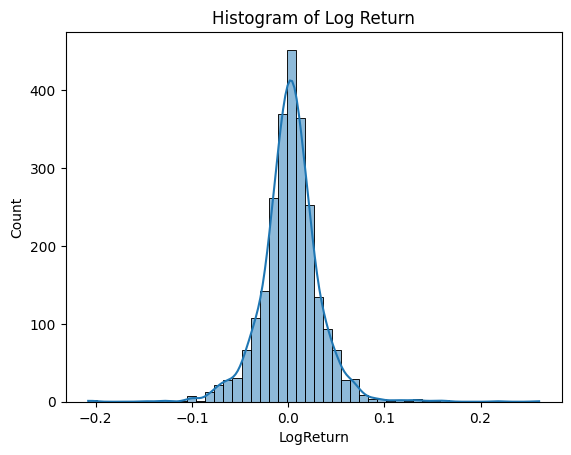

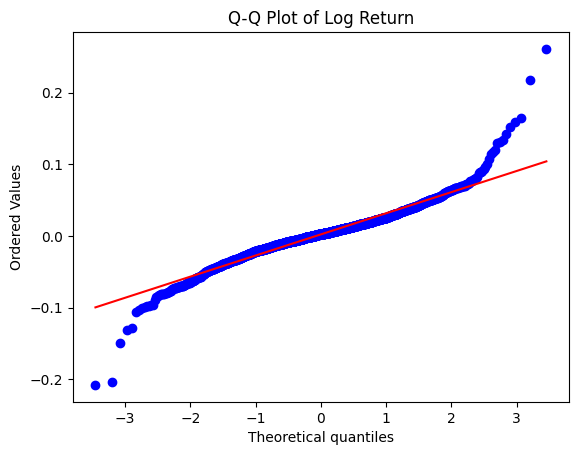

Shapiro-Wilk Test: Statistic=0.9392, p-value=0.0000
Jarque-Bera Test: Statistic=4836.3840, p-value=0.0000


In [11]:
nvidia['LogReturn'] = np.log(nvidia['Close']).diff()
nvidia = nvidia.dropna()

adf_test(nvidia['LogReturn'], title='Log Return')
kpss_test(nvidia['LogReturn'], title='Log Return')

# Histogram
sns.histplot(nvidia['LogReturn'], bins=50, kde=True)
plt.title('Histogram of Log Return')
plt.show()

# Q-Q plot
probplot(nvidia['LogReturn'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Log Return')
plt.show()


# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(nvidia['LogReturn'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

# Jarque-Bera test
jb_stat, jb_p = jarque_bera(nvidia['LogReturn'])
print(f"Jarque-Bera Test: Statistic={jb_stat:.4f}, p-value={jb_p:.4f}")


In [12]:
print(f"Skewness: {skew(nvidia['LogReturn']):.4f}")
print(f"Kurtosis: {kurtosis(nvidia['LogReturn']):.4f}")


Skewness: 0.2082
Kurtosis: 6.7957


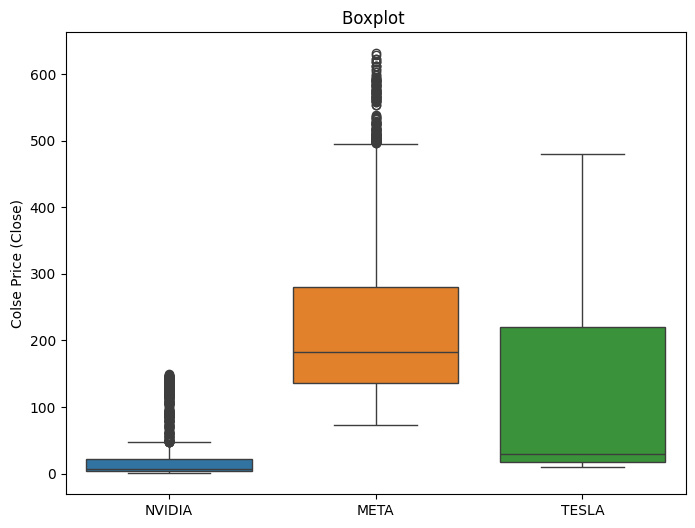

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# รวมข้อมูลราคาปิด
close_prices = pd.DataFrame({
    'NVIDIA': nvidia['Close'],
    'META': meta['Close'],
    'TESLA': tesla['Close']
})

plt.figure(figsize=(8, 6))
sns.boxplot(data=close_prices)
plt.title('Boxplot ')
plt.ylabel('Colse Price (Close)')
plt.show()